15.1

KorzystajÄc ze zbioru danych "Iris" dostÄpnego w bibliotece scikit-learn, zadanie klasyfikacji ma na celu przewidzenie gatunku irysa (Setosa, Versicolor, lub Virginica) na podstawie cech takich jak dĹugoĹÄ i szerokoĹÄ pĹatkĂłw oraz dĹugoĹÄ i szerokoĹÄ dziaĹek kielicha.

In [3]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score

# 1. Wczytanie zbioru danych Iris
iris = load_iris()
X = iris.data
y = iris.target
target_names = iris.target_names

# 2. PodziaĹ danych na zbiĂłr treningowy i testowy
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# 3. Trening modelu klasyfikacji (SVM)
svm_classifier = SVC(kernel='linear', random_state=42)
svm_classifier.fit(X_train, y_train)

# 4. Predykcja na zbiorze testowym
y_pred = svm_classifier.predict(X_test)

# 5. Wyniki klasyfikacji
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred, target_names=target_names)

accuracy, classification_rep

(1.0,
 '              precision    recall  f1-score   support\n\n      setosa       1.00      1.00      1.00        19\n  versicolor       1.00      1.00      1.00        13\n   virginica       1.00      1.00      1.00        13\n\n    accuracy                           1.00        45\n   macro avg       1.00      1.00      1.00        45\nweighted avg       1.00      1.00      1.00        45\n')

15.1

Dla tego zadania, skorzystamy z zbioru danych "Boston House Prices" dostÄpnego w scikit-learn. Celem jest przewidzenie cen domĂłw w Bostonie na podstawie rĂłĹźnych cech, takich jak liczba pokoi, wspĂłĹczynnik przestÄpczoĹci w okolicy, czy odlegĹoĹÄ do zatrudnienia.

In [4]:
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score

# 1. Wczytanie zbioru danych Boston House Prices z OpenML
housing = fetch_openml(name="boston", as_frame=True)
X = housing.data
y = housing.target

# 2. PodziaĹ danych na zbiĂłr treningowy i testowy
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# 3. Trening modelu regresji (SVM z jÄdrem liniowym)
svm_regressor = SVR(kernel='linear')
svm_regressor.fit(X_train, y_train)

# 4. Predykcja na zbiorze testowym
y_pred = svm_regressor.predict(X_test)

# 5. Ocena modelu
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

mse, r2

/usr/local/lib/python3.10/dist-packages/sklearn/datasets/_openml.py:320: UserWarning: Multiple active versions of the dataset matching the name boston exist. Versions may be fundamentally different, returning version 1. Available versions:
- version 1, status: active
  url: https://www.openml.org/search?type=data&id=531
- version 2, status: active
  url: https://www.openml.org/search?type=data&id=853

  warn(warning_msg)


(25.626399937370916, 0.6560819310743812)

15.2

Dla zbioru danych poniĹźej stwĂłrz modele SVM z kernelem liniowym, radial i polynominal w kilku wariantach stopni wielomianu. Narysuj wykresy oraz policz skutecznoĹÄ modeli. KtĂłry byĹ najskuteczniejszy?

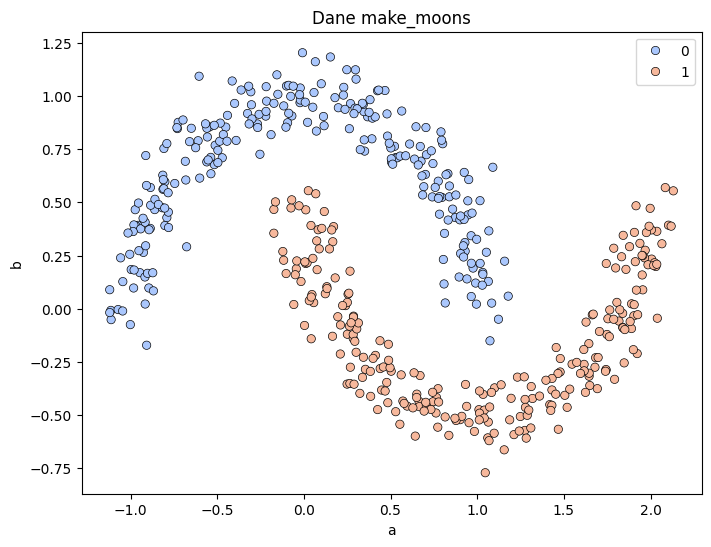

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


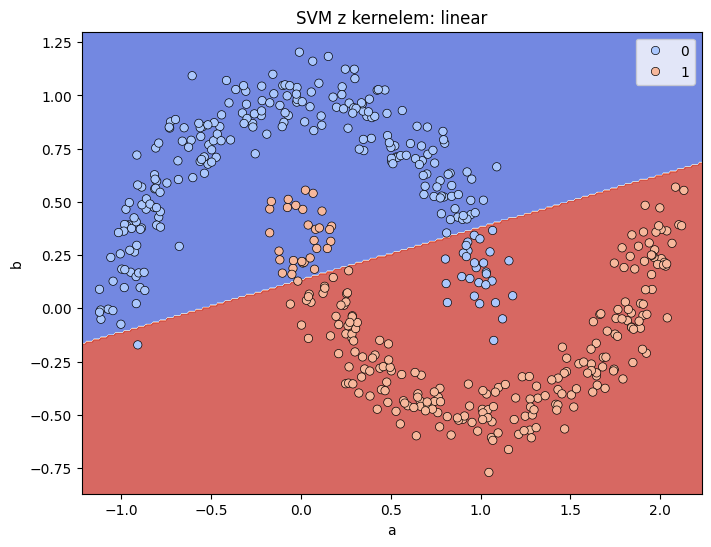

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


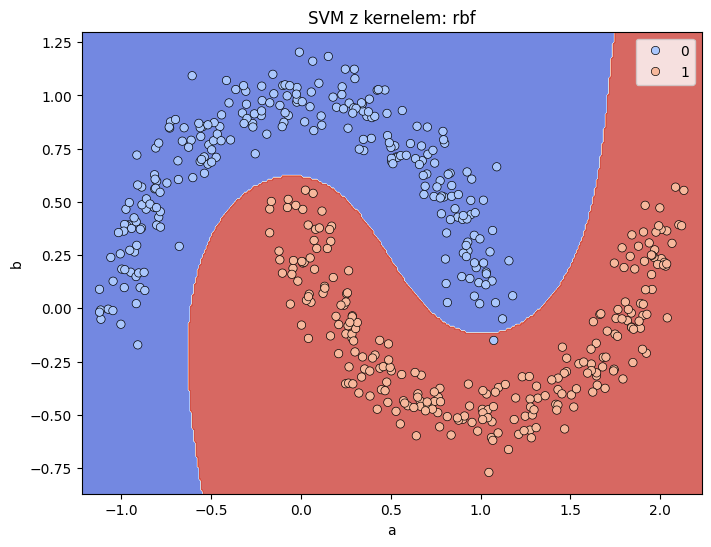

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


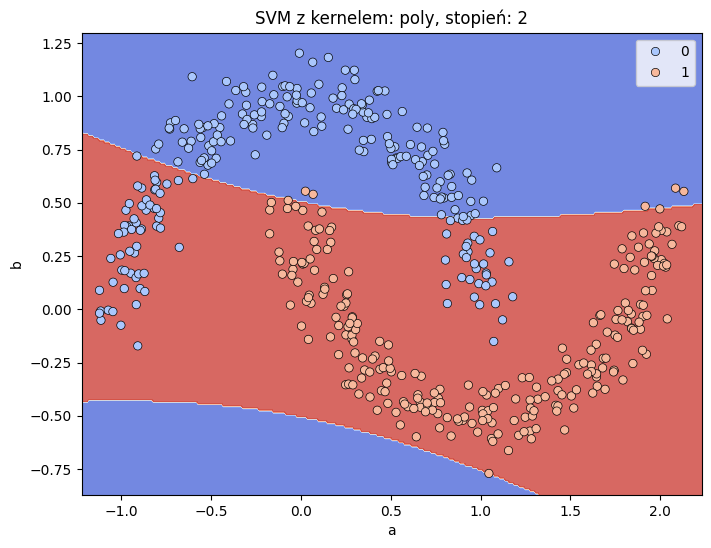

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


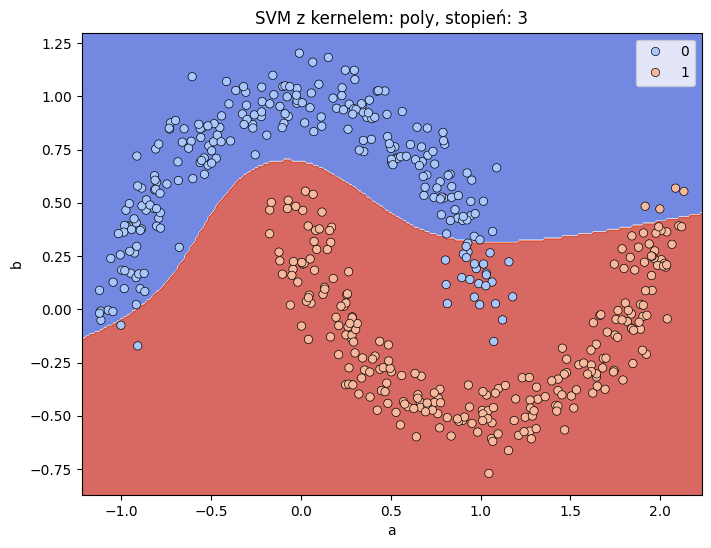

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


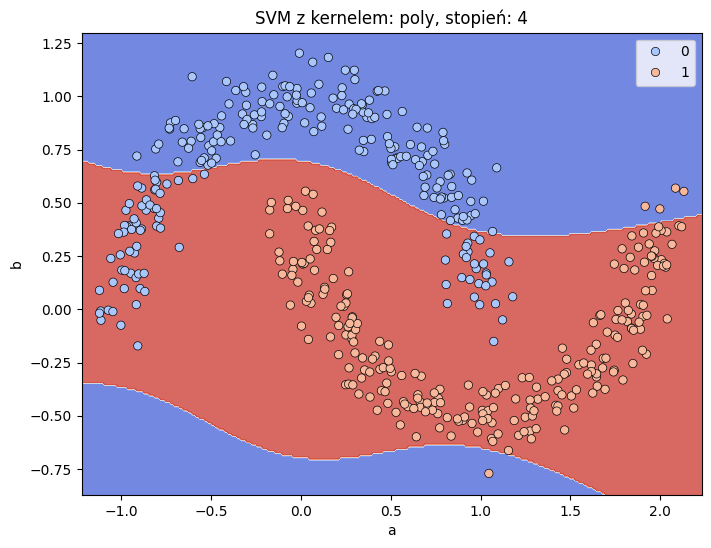

{'linear': 0.8933333333333333,
 'rbf': 1.0,
 'poly_degree_2': 0.8,
 'poly_degree_3': 0.9333333333333333,
 'poly_degree_4': 0.8066666666666666}

In [5]:
import pandas as pd
import numpy as np
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Generowanie danych make_moons
df = make_moons(n_samples=500, random_state=0, noise=0.09)
X = pd.DataFrame(df[0], columns=['a', 'b'])
y = df[1]

# Wizualizacja danych
plt.figure(figsize=(8, 6))
sns.scatterplot(data=X, x='a', y='b', hue=y, palette='coolwarm', edgecolor='k')
plt.title("Dane make_moons")
plt.show()

# 2. PodziaĹ na zbiĂłr treningowy i testowy
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# 3. Trening modeli SVM z rĂłĹźnymi kernelami
kernels = ['linear', 'rbf', 'poly']
degrees = [2, 3, 4]  # Dla kernela wielomianowego
results = {}

for kernel in kernels:
    if kernel == 'poly':
        for degree in degrees:
            model = SVC(kernel=kernel, degree=degree, random_state=42)
            model.fit(X_train, y_train)
            y_pred = model.predict(X_test)
            accuracy = accuracy_score(y_test, y_pred)
            results[f"{kernel}_degree_{degree}"] = accuracy
    else:
        model = SVC(kernel=kernel, random_state=42)
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        accuracy = accuracy_score(y_test, y_pred)
        results[kernel] = accuracy

# 4. Wizualizacja granic decyzyjnych
def plot_decision_boundaries(X, y, model, title):
    x_min, x_max = X.iloc[:, 0].min() - 0.1, X.iloc[:, 0].max() + 0.1
    y_min, y_max = X.iloc[:, 1].min() - 0.1, X.iloc[:, 1].max() + 0.1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                         np.arange(y_min, y_max, 0.01))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.figure(figsize=(8, 6))
    plt.contourf(xx, yy, Z, alpha=0.8, cmap='coolwarm')
    sns.scatterplot(x=X.iloc[:, 0], y=X.iloc[:, 1], hue=y, palette='coolwarm', edgecolor='k')
    plt.title(title)
    plt.show()

# Rysowanie granic decyzyjnych dla kaĹźdego modelu
for kernel in kernels:
    if kernel == 'poly':
        for degree in degrees:
            model = SVC(kernel=kernel, degree=degree, random_state=42)
            model.fit(X_train, y_train)
            plot_decision_boundaries(X, y, model, f"SVM z kernelem: {kernel}, stopieĹ: {degree}")
    else:
        model = SVC(kernel=kernel, random_state=42)
        model.fit(X_train, y_train)
        plot_decision_boundaries(X, y, model, f"SVM z kernelem: {kernel}")

# Wyniki skutecznoĹci
results

15.3

- UĹźyj klasyfikatora SVM z kernela liniowego w podejĹciu One-vs-One do klasyfikacji trzech klas (setosa, versicolor, virginica) na podstawie cech kwiatĂłw z datasetu Iris.
- Podziel zbiĂłr danych na zbiĂłr treningowy i testowy.
- Wytrenuj model SVM za pomocÄ podejĹcia OvO.
- Dokonaj predykcji dla danych testowych.
- OceĹ dokĹadnoĹÄ modelu.

In [6]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.multiclass import OneVsOneClassifier
from sklearn.metrics import accuracy_score, classification_report

# 1. Wczytanie zbioru danych Iris
iris = load_iris()
X = iris.data
y = iris.target

# 2. PodziaĹ danych na zbiĂłr treningowy i testowy
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# 3. Wytrenowanie modelu SVM z podejĹciem One-vs-One
ovo_classifier = OneVsOneClassifier(SVC(kernel='linear', random_state=42))
ovo_classifier.fit(X_train, y_train)

# 4. Predykcja na zbiorze testowym
y_pred = ovo_classifier.predict(X_test)

# 5. Ocena modelu
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred, target_names=iris.target_names)

accuracy, classification_rep

(1.0,
 '              precision    recall  f1-score   support\n\n      setosa       1.00      1.00      1.00        19\n  versicolor       1.00      1.00      1.00        13\n   virginica       1.00      1.00      1.00        13\n\n    accuracy                           1.00        45\n   macro avg       1.00      1.00      1.00        45\nweighted avg       1.00      1.00      1.00        45\n')

15.3

- UĹźyj klasyfikatora SVM z kernela liniowego w podejĹciu One-vs-Rest do klasyfikacji trzech klas na podstawie tych samych danych Iris.
- Podziel zbiĂłr danych na zbiĂłr treningowy i testowy.
- Wytrenuj model SVM za pomocÄ podejĹcia OvR.
- Dokonaj predykcji dla danych testowych.
- OceĹ dokĹadnoĹÄ modelu.

In [7]:
from sklearn.multiclass import OneVsRestClassifier

# 1. Wytrenowanie modelu SVM z podejĹciem One-vs-Rest
ovr_classifier = OneVsRestClassifier(SVC(kernel='linear', random_state=42))
ovr_classifier.fit(X_train, y_train)

# 2. Predykcja na zbiorze testowym
y_pred_ovr = ovr_classifier.predict(X_test)

# 3. Ocena modelu
accuracy_ovr = accuracy_score(y_test, y_pred_ovr)
classification_rep_ovr = classification_report(y_test, y_pred_ovr, target_names=iris.target_names)

accuracy_ovr, classification_rep_ovr

(0.9555555555555556,
 '              precision    recall  f1-score   support\n\n      setosa       1.00      1.00      1.00        19\n  versicolor       1.00      0.85      0.92        13\n   virginica       0.87      1.00      0.93        13\n\n    accuracy                           0.96        45\n   macro avg       0.96      0.95      0.95        45\nweighted avg       0.96      0.96      0.96        45\n')

15.4

ZbiĂłr mnist (pierwszych 2000 obserwacji) podziel na zbiory: treningowy walidacyjny, testowy w stosunku 60%, 20% 20%. NastÄpnie sprĂłbuj znaleĹşÄ najlepszy model SVM. Przetestuj rĂłĹźne kernele i ich hiperparametry (C, gamma) sprawdzajÄc skutecznoĹÄ (accuracy score) na zbiorze walidacyjnym. Wybierz najlepszy model i na koĹcu policz skutecznoĹÄ tego modelu na zbiorze testowym.

In [8]:
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# 1. Wczytanie zbioru danych MNIST (pierwsze 2000 obserwacji)
mnist = fetch_openml('mnist_784', version=1, as_frame=False)
X, y = mnist.data[:2000], mnist.target[:2000]

# 2. PodziaĹ na zbiory: treningowy (60%), walidacyjny (20%), testowy (20%)
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.4, random_state=42, stratify=y)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42, stratify=y_temp)

# 3. Definicja przestrzeni poszukiwaĹ hiperparametrĂłw
param_grid = {
    'kernel': ['linear', 'rbf', 'poly'],
    'C': [0.1, 1, 10],
    'gamma': ['scale', 'auto']
}

# 4. GridSearchCV do wyszukiwania najlepszego modelu na zbiorze walidacyjnym
svm = SVC(random_state=42)
grid_search = GridSearchCV(svm, param_grid, cv=3, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train, y_train)

# 5. Najlepszy model i ocena na zbiorze walidacyjnym
best_model = grid_search.best_estimator_
val_accuracy = accuracy_score(y_val, best_model.predict(X_val))

# 6. Ocena najlepszego modelu na zbiorze testowym
test_accuracy = accuracy_score(y_test, best_model.predict(X_test))

grid_search.best_params_, val_accuracy, test_accuracy

({'C': 10, 'gamma': 'scale', 'kernel': 'rbf'}, 0.905, 0.9625)

15.5

Twoim zadaniem jest zastosowanie algorytmu K-Nearest Neighbors (KNN) do klasyfikacji cech win na podstawie dostÄpnych pomiarĂłw. W tym przypadku uĹźyj zbioru danych Wine, ktĂłry zawiera trzy klasy win (klasyfikacja na podstawie trzech rĂłĹźnych odmian win).

In [9]:
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report

# 1. Wczytanie zbioru danych Wine
wine = load_wine()
X = wine.data
y = wine.target
target_names = wine.target_names

# 2. PodziaĹ danych na zbiĂłr treningowy i testowy
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# 3. Trening modelu KNN
knn_classifier = KNeighborsClassifier(n_neighbors=5)  # Liczba sÄsiadĂłw
knn_classifier.fit(X_train, y_train)

# 4. Predykcja na zbiorze testowym
y_pred = knn_classifier.predict(X_test)

# 5. Ocena modelu
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred, target_names=target_names)

accuracy, classification_rep

(0.7222222222222222,
 '              precision    recall  f1-score   support\n\n     class_0       0.89      0.89      0.89        18\n     class_1       0.78      0.67      0.72        21\n     class_2       0.50      0.60      0.55        15\n\n    accuracy                           0.72        54\n   macro avg       0.72      0.72      0.72        54\nweighted avg       0.74      0.72      0.73        54\n')

15.6

Dla zbioru danych Iris z biblioteki sklearn. Zastosuj algorytm K-Means do klastrowania tych danych w celu zidentyfikowania naturalnych grup.

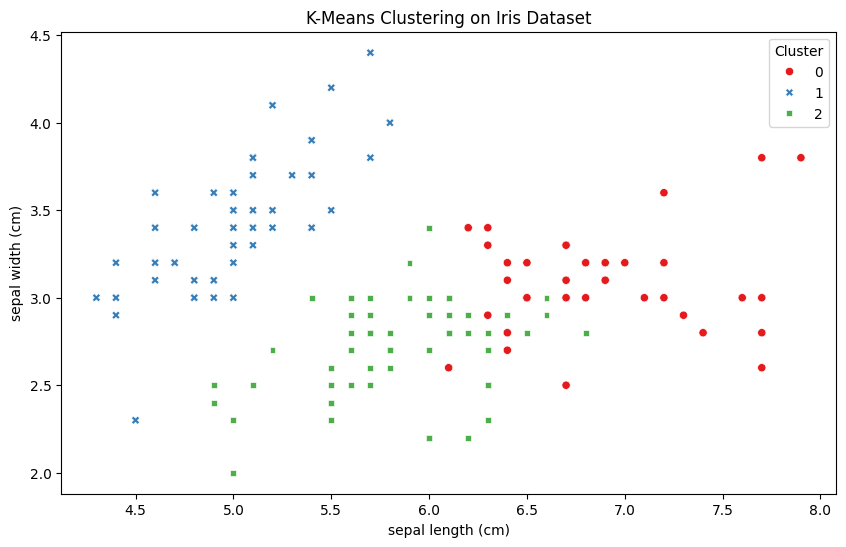

0.551191604619592

In [10]:
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# 1. Wczytanie zbioru danych Iris
iris = load_iris()
X = iris.data
y = iris.target

# 2. Zastosowanie algorytmu K-Means do klastrowania
kmeans = KMeans(n_clusters=3, random_state=42)  # 3 grupy, poniewaĹź wiemy, Ĺźe sÄ 3 gatunki
kmeans.fit(X)
clusters = kmeans.labels_

# 3. Obliczenie miary silhouette score
silhouette_avg = silhouette_score(X, clusters)

# 4. Wizualizacja klastrĂłw
df = pd.DataFrame(X, columns=iris.feature_names)
df['Cluster'] = clusters

plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=df,
    x=iris.feature_names[0],
    y=iris.feature_names[1],
    hue='Cluster',
    palette='Set1',
    style='Cluster'
)
plt.title("K-Means Clustering on Iris Dataset")
plt.xlabel(iris.feature_names[0])
plt.ylabel(iris.feature_names[1])
plt.legend(title="Cluster")
plt.show()

silhouette_avg

15.7

Dla zbioru danych load_digits() znajdĹş optymalnÄ liczbÄ klastrĂłw za pomocÄ algorytmu K-Means i metody âĹokciaâ.

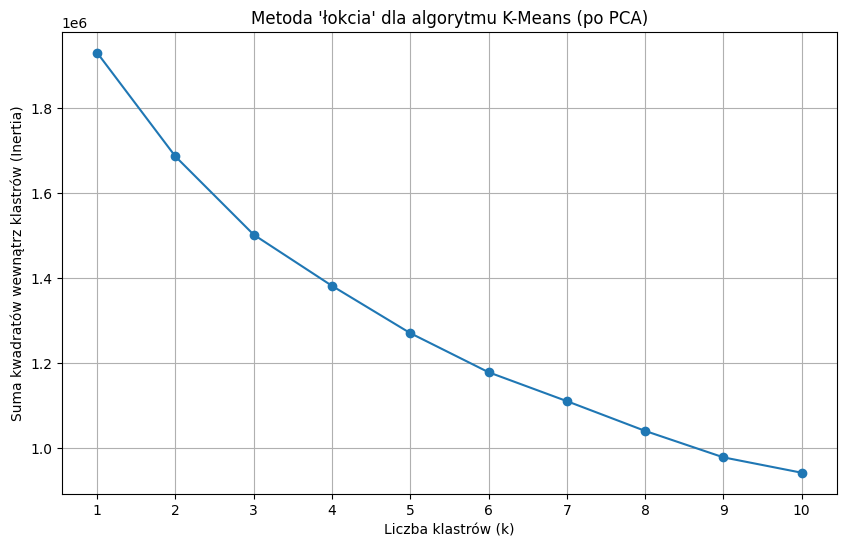

In [11]:
from sklearn.decomposition import PCA
from sklearn.datasets import load_digits
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Wczytanie zbioru danych Digits
digits = load_digits()
X = digits.data

# Redukcja wymiarowoĹci za pomocÄ PCA
pca = PCA(n_components=20, random_state=42)  # Zredukowanie do 20 wymiarĂłw
X_pca = pca.fit_transform(X)

# Obliczanie sumy kwadratĂłw wewnÄtrz klastrĂłw dla rĂłĹźnych wartoĹci k
inertia_values = []
k_values = range(1, 11)  # Testowanie liczby klastrĂłw od 1 do 10

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X_pca)
    inertia_values.append(kmeans.inertia_)

# Wizualizacja metody "Ĺokcia"
plt.figure(figsize=(10, 6))
plt.plot(k_values, inertia_values, marker='o')
plt.title("Metoda 'Ĺokcia' dla algorytmu K-Means (po PCA)")
plt.xlabel("Liczba klastrĂłw (k)")
plt.ylabel("Suma kwadratĂłw wewnÄtrz klastrĂłw (Inertia)")
plt.xticks(k_values)
plt.grid()
plt.show()